# Contextual Multi-Armed Bandits for Recommender System

Contextual Multi-Armed Bandits are the same as the MAB algorithm, but in addition they also consider contextual data. Context data can be agent attributes and action attributes. 

A more traditionial ML model uses the context data to model the probability of the reward.

P(reward | Agend Data, Action data)

The CMAB framework can be used to recommend items to users. Actions are decided based on the expected reward, and based on a state learned from the user's data. As a result, the recommendations are personalized at the user level. CMAB are appealing as recommender systems because they can use both user and item attribute data as well as historical engagmeent singals to make a recommendation. Its is a form of hybrid recommender systems, typically the most powerful. 

I want to use CMAB to solve 2 challenges in recommender systems:
1. The cold start problem by recommending items base only on user-item content without any historical engagement data. 
2. The echo champer problem by continuing to introduce newness

# Example - Contextual Multi-Armed Bandits Book Recommender

## Formatting the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
books_df = pd.read_csv('data/book_ratings.csv', sep=";", escapechar='\\', encoding='CP1252', low_memory=False)
books_df.columns = ["user", "isbn", "rating"]

#subset data to top n books
n=15
top_n_books = books_df.isbn.value_counts().index[:n].tolist()
books_df = books_df.query('isbn in @top_n_books')
print("{} unique users".format(books_df.user.nunique()))
print("{} unique books".format(books_df.isbn.nunique()))

#remove read but unrated books
#books_df = books_df.query('rating > 0')

#remove users who only rated one thing. 
#vc = books_df.user.value_counts()
#keep_users = vc[vc > 1].index

#books_df = books_df.query('user in @keep_users')

print(books_df.shape)
books_df.head(3)

7842 unique users
15 unique books
(12041, 3)


,user,isbn,rating
426,276925,0316666343,0
429,276925,0385504209,8
457,276925,0971880107,0


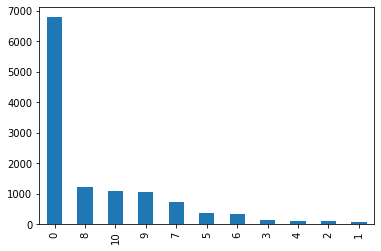

Average rating: 3.3457


In [6]:
#ratings are on a scale of 1-10.
books_df.rating.value_counts().plot(kind="bar")
plt.show()
print("Average rating: {}".format(np.round(books_df.rating.mean(),4)))

In [7]:
books_items = pd.read_csv('data/books.csv', sep=";", escapechar='\\', encoding='CP1252', low_memory=False)
books_users = pd.read_csv('data/users.csv', sep=";", escapechar='\\', encoding='CP1252', low_memory=False)


In [8]:
books_items.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
books_df

,user,isbn,rating
426,276925,0316666343,0
429,276925,0385504209,8
457,276925,0971880107,0
622,276939,059035342X,0
625,276939,0971880107,0
...,...,...,...
1149407,276670,067976402X,0
1149493,276680,0316666343,7
1149516,276680,0375727345,8
1149530,276680,0385504209,8


In [12]:
#note this code is not running due to python 3 package install ussues on M1 chip Apple laptops 
#Thanks apple. 
#Packages that wont install are seaborn and sklearn. pretty core for ML...
#keeping this code block around cause I'd love to see the viz. Can try to run on Ec2 later. Amazon $$$

#vizualize to see if there are distinct groups

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

books_no_duplicates = books_df.drop_duplicates("user")

pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(books_no_duplicates[feature_names]) 

kmeans = KMeans(n_clusters=4, random_state=0)
groups = kmeans.fit_predict(pca_matrix)

books_no_duplicates["PC1"] = pca_matrix[:,0]
books_no_duplicates["PC2"] = pca_matrix[:,1]
books_no_duplicates["groups"] = groups

plt.scatter(books_no_duplicates.query('groups==0').PC1, books_no_duplicates.query('groups==0').PC2, label='group1');
plt.scatter(books_no_duplicates.query('groups==1').PC1, books_no_duplicates.query('groups==1').PC2, label='group2');
plt.scatter(books_no_duplicates.query('groups==2').PC1, books_no_duplicates.query('groups==2').PC2, label='group3');
plt.scatter(books_no_duplicates.query('groups==3').PC1, books_no_duplicates.query('groups==3').PC2, label='group4');
plt.legend();

ModuleNotFoundError: No module named 'sklearn'

## Write the Algorithm

In [10]:
import numpy as np
import pandas as pd
#other imports wont work. need scipy cufflines and plotly

In [ ]:
#I don't feel the need to handcode the log red, tree based model whatever we use. 
#pull that shit in from sklearn 